<a href="https://colab.research.google.com/github/eddieHerman-lab/Analise_De_Student_addiction_Dataset/blob/main/AnaliseDe_Student_addiction_Dataset_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Dados sobre Vícios em Estudantes

Introdução
Este projeto visa analisar os padrões de comportamento relacionados a vícios em estudantes utilizando técnicas de clustering, análise de componentes principais (PCA) e regressão linear. O objetivo é identificar grupos distintos de estudantes com base em seus comportamentos e características.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Importar bibiotecas necessarias

Preparacao de dados,tratamento e limpeza
Descrição dos Dados O dataset contém informações sobre comportamentos relacionados a vícios em estudantes, incluindo experimentação, desempenho acadêmico, isolamento social, problemas financeiros e de saúde mental. Dados exportados do Kaggle.

In [11]:
df = pd.read_csv('/student_addiction_dataset_test.csv') #Exportando os dados
# Visualizar as primeiras linhas do DataFrame
pd.set_option('display.max_columns', None)
# Mapear 'NÃO' para False e 'SIM' para True em todas as colunas
df = df.replace({'No': False, 'Yes': True})
df.fillna(0, inplace=True)

Analise exploratoria dos dados;
Estatisticas descritivas e visualizacoes iniciais;
Descricao de medias por grupos;
Descricao de desvio padrao por grupos;
Realizacao de tabela cruzada entre as colunas Experimentation e Addiction Class

In [12]:
grouped = df.groupby('Addiction_Class')
mean_values = grouped.mean()
std_values = grouped.std()
print(mean_values, 'Mean values for each group')
print(std_values, 'Standard deviation for each group')

differences = []
for column in df.columns:
    counts = df[column].value_counts()
    Sim_counts = counts.get(True, 0)
    Nao_counts = counts.get(False, 0)
    diff = Sim_counts - Nao_counts
    differences.append((column, diff))

cross_tab = pd.crosstab(df['Experimentation'], df['Addiction_Class'])
print(cross_tab, 'Cross tabs Experimentation and Addiction')
print(cross_tab.corr())

                Experimentation Academic_Performance_Decline Social_Isolation  \
Addiction_Class                                                                 
False                  0.289758                     0.296487         0.290351   
True                   0.287609                      0.28382         0.295945   

                Financial_Issues Physical_Mental_Health_Problems  \
Addiction_Class                                                    
False                   0.291737                        0.291044   
True                    0.297082                        0.312997   

                Legal_Consequences Relationship_Strain Risk_Taking_Behavior  \
Addiction_Class                                                               
False                      0.29431            0.293617               0.2857   
True                      0.281925            0.307313             0.321334   

                Withdrawal_Symptoms Denial_and_Resistance_to_Treatment  
Addiction_Cl

Normalizacao dos dados


In [13]:
# Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Análise de Clustering com K-Means e PCA
MODELAGEM

### Por que se ultiliza K-Means?
O algoritmo de K-Means é uma técnica de aprendizado não supervisionado usada para particionar um conjunto de dados em um número pré-definido de clusters. Cada ponto de dado pertence ao cluster cujo centro está mais próximo, resultando em uma divisão dos dados em grupos distintos. Esta abordagem é útil quando queremos identificar subgrupos em nossos dados que possuem características similares, o que pode fornecer insights valiosos sobre padrões de comportamento ou características comuns entre diferentes grupos.

### Processo de Clustering
1. Normalização dos Dados:
   Antes de aplicar o K-Means, foi normalizado  os dados para garantir que todas as variáveis estejam na mesma escala. Isso é feito utilizando `StandardScaler`, que transforma os dados para que tenham média zero e desvio padrão um.

In [14]:
# Encontrando o melhor número de clusters com o método do cotovelo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

Visualicacao com Matplotlib para melhor entendimento


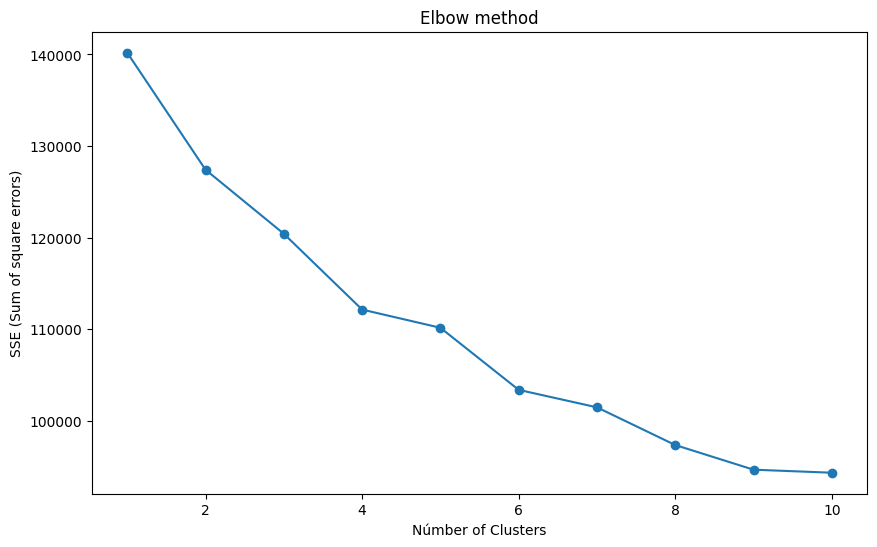

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Númber of Clusters')
plt.ylabel('SSE (Sum of square errors)')
plt.title('Elbow method')
plt.show()

Aplicação do K-Means:
Após determinar o número apropriado de clusters , aplicamos o K-Means para particionar os dados em clusters.

In [16]:
# A partir do gráfico, escolha o número apropriado de clusters (por exemplo, 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

Análise de Componentes Principais (PCA)
A PCA é uma técnica de redução de dimensionalidade que transforma um conjunto de variáveis correlacionadas em um conjunto menor de variáveis não correlacionadas chamadas componentes principais. Esta abordagem é útil para visualizar dados de alta dimensão em gráficos de duas ou três dimensões, mantendo a maior parte da variância original dos dados.

Aplicação da PCA:
Aplicamos a PCA para reduzir os dados a cinco componentes principais, o que facilita a visualização e a análise dos clusters.

In [17]:
# PCA com mais componentes
pca = PCA(n_components=5)  # Aumentando o número de componentes para 5
principalComponents = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained variance by component:")
print(explained_variance)
num_columns = df.shape[1]
# DataFrame dos componentes principais
principal_df = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(5)])
print("Principal components:")
components = pd.DataFrame(pca.components_, columns=df.columns[:-1], index=[f'PC{i+1}' for i in range(5)])
print(components)

Explained variance by component:
[0.0954373  0.09383829 0.09356629 0.09244031 0.09132979]
Principal components:
     Experimentation  Academic_Performance_Decline  Social_Isolation  \
PC1        -0.204524                     -0.232822          0.135852   
PC2         0.459706                     -0.214820          0.465756   
PC3         0.216074                      0.486823         -0.270261   
PC4        -0.162386                     -0.396946         -0.340566   
PC5        -0.114820                      0.103085         -0.343209   

     Financial_Issues  Physical_Mental_Health_Problems  Legal_Consequences  \
PC1          0.182485                         0.302247           -0.386635   
PC2         -0.080249                         0.014604            0.517653   
PC3          0.501262                        -0.328520            0.155115   
PC4          0.043617                        -0.209144           -0.054388   
PC5          0.318602                         0.324491           

Visualizacao dos clusters

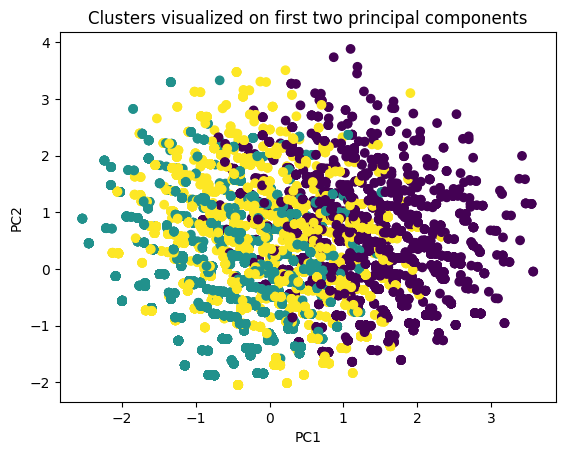

In [18]:
# Visualizar os clusters nas primeiras duas componentes principais
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters visualized on first two principal components')
plt.show()

Ajustando o Modelo de K-Means com Mais Componentes Principais
Após a normalização dos dados e a aplicação do K-Means inicialmente, foi utilizado a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados. A PCA transforma os dados originais em componentes principais que explicam a maior parte da variação nos dados. Usar mais componentes principais significa capturar mais variabilidade dos dados, o que pode levar a uma melhor separação entre os clusters.

Isso permite que o modelo K-Means trabalhe com uma representação mais rica dos dados, que pode melhorar a qualidade do clustering.

Motivação

A principal motivação para ajustar o K-Means com mais componentes principais é melhorar a qualidade do clustering. Componentes principais adicionais podem capturar mais variância nos dados, o que pode ajudar o K-Means a identificar padrões mais claros e formar clusters mais coesos. Além disso, a utilização de componentes principais reduzidos pode facilitar a visualização e interpretação dos clusters.Como um melhor vizualizacao,e grupos mais distintos com menor dimensionalidade  e possivel inferir fatores de causalidade relacionados a eles




In [19]:
# Ajustar o modelo de KMeans com mais componentes principais
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(principalComponents)

Interpretação das Distribuições
A partir dessas visualizações, você pode observar como cada variável se comporta dentro de cada cluster. Por exemplo:

Experimentation: Pode-se observar que o nível de experimentação varia significativamente entre os clusters, indicando que alguns grupos de estudantes são mais propensos a experimentar substâncias do que outros.
Academic Performance Decline: A queda no desempenho acadêmico pode ser mais pronunciada em alguns clusters, sugerindo uma correlação entre certos tipos de vícios e o impacto negativo no desempenho acadêmico.
Social Isolation: A análise pode revelar que determinados clusters têm uma maior incidência de isolamento social, o que pode estar associado a comportamentos de vício.

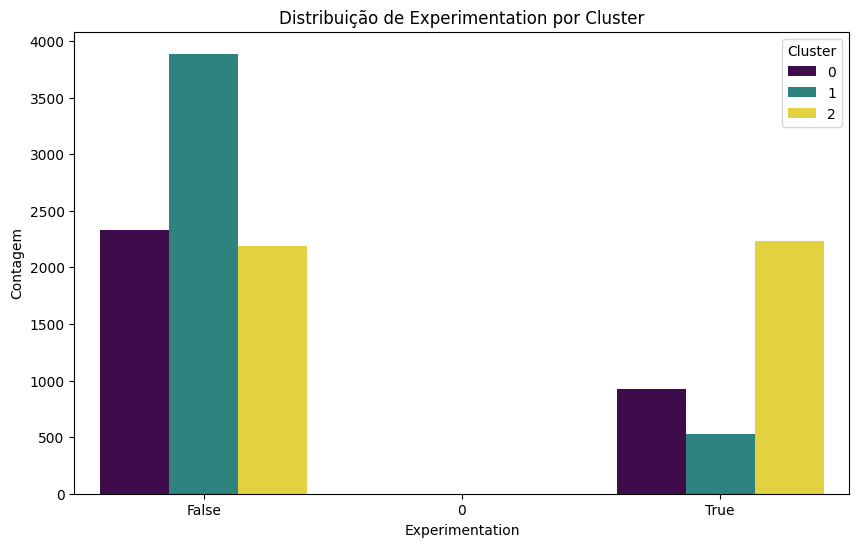

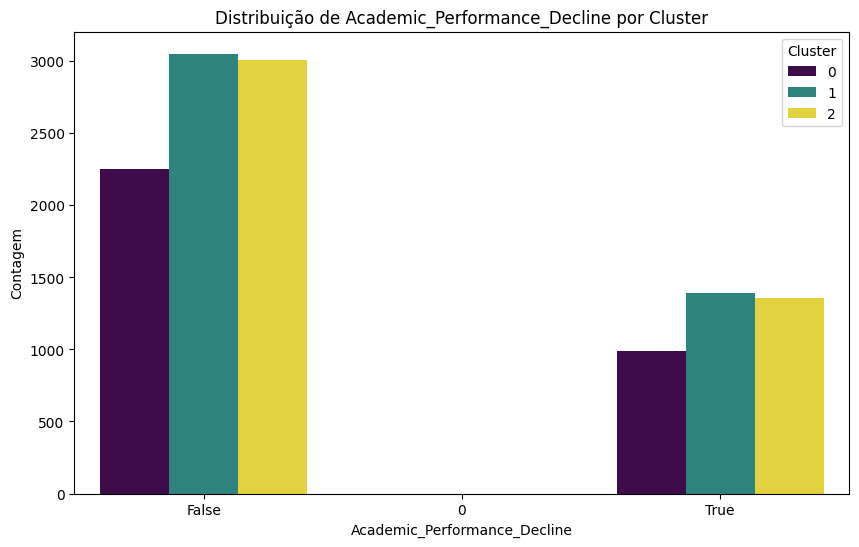

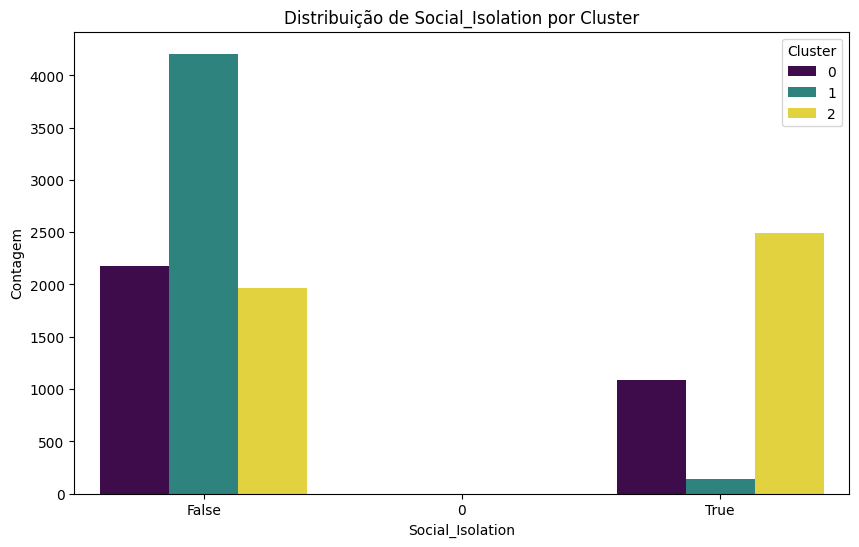

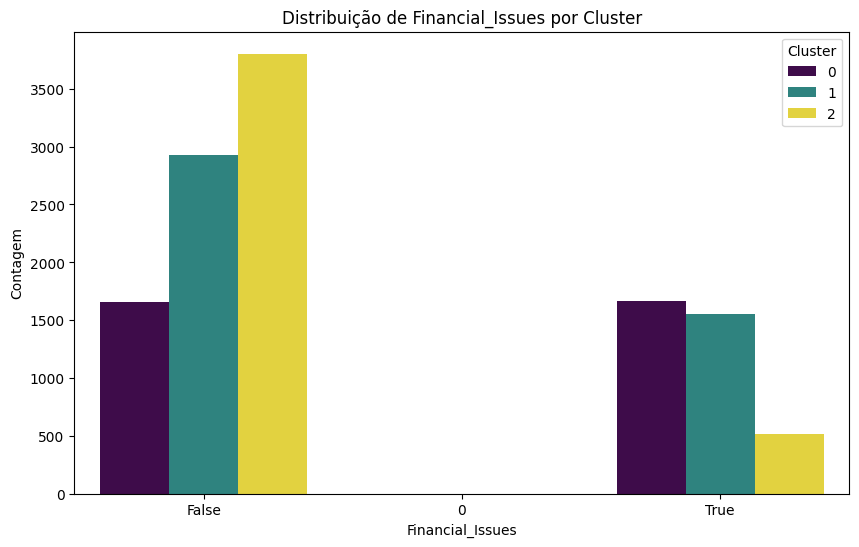

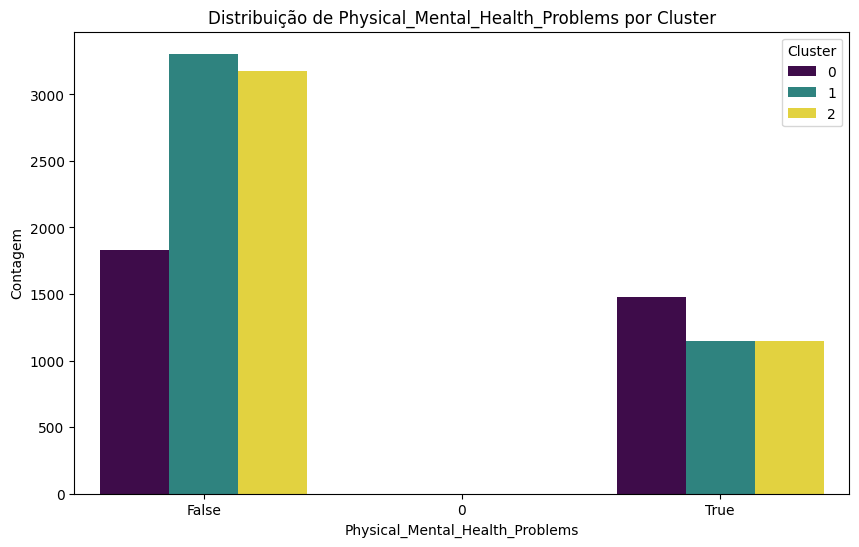

In [20]:
# Analisando os clusters
colunas = ['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation', 'Financial_Issues', 'Physical_Mental_Health_Problems']
for coluna in colunas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, hue='Cluster', palette='viridis')
    plt.title(f'Distribuição de {coluna} por Cluster')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.legend(title='Cluster')
    plt.show()


Silhouette Score
O Silhouette Score é uma métrica usada para avaliar a qualidade do clustering. Ele mede o quão semelhante um ponto é ao seu próprio cluster em comparação com outros clusters.

In [21]:
# Silhouette Score com mais componentes principais
score = silhouette_score(principalComponents, df['Cluster'])
print(f'Silhouette Score with more components: {score}')

Silhouette Score with more components: 0.1359278033592456


Regressão Linear com Componentes Principais e Validação Cruzada
Objetivo
O objetivo desta parte da análise é ajustar um modelo de regressão linear para prever a classe de vício (Addiction_Class) com base nas componentes principais obtidas a partir da PCA. Além disso, usamos validação cruzada (cross-validation) para avaliar a performance do modelo.

In [22]:
# Regressão Linear com mais componentes principais
#Preparação dos Dados para Regressão:
#X são as componentes principais obtidas da PCA.
#y é a variável alvo, Addiction_Class.
model = LinearRegression()
X = principalComponents
y = df['Addiction_Class']
model.fit(X, y)

LinearRegression()

Validação Cruzada (Cross-Validation):
Utilizamos a técnica de validação cruzada com 5 folds (cv=5) para avaliar a performance do modelo de regressão linear.
A validação cruzada divide os dados em 5 partes. Em cada iteração, uma parte é usada como conjunto de teste e as outras quatro como conjunto de treinamento. Este processo é repetido 5 vezes, com cada parte sendo usada uma vez como conjunto de teste.
cross_val_score é utilizado para calcular as métricas de avaliação (neste caso, o coeficiente de determinação
𝑅
2
R
2
 ) para cada iteração.

In [23]:

# Cross Validation com mais componentes principais
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores with more components: {scores}')
print(f'Average cross-validation score with more components: {np.mean(scores)}')

Cross-validation scores with more components: [0.43954053 0.44829502 0.45917799 0.44394471 0.45389349]
Average cross-validation score with more components: 0.4489703474161403


In [24]:
# Agrupando por cluster e calculando a média para cada característica
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

        Experimentation Academic_Performance_Decline Social_Isolation  \
Cluster                                                                 
0              0.267805                     0.287203          0.31355   
1              0.113409                     0.296952         0.029844   
2              0.484888                     0.295716         0.541857   

        Financial_Issues Physical_Mental_Health_Problems Legal_Consequences  \
Cluster                                                                       
0                0.48176                        0.428199            0.19253   
1                0.33042                        0.243871           0.140269   
2               0.112633                         0.24875           0.520765   

        Relationship_Strain Risk_Taking_Behavior Withdrawal_Symptoms  \
Cluster                                                                
0                  0.515345             0.545165            0.390272   
1                  0.1

Correlação entre Variáveis para cada Cluster e Visualizações
Objetivo
O objetivo dessa parte da análise é entender a relação entre diferentes variáveis dentro de cada cluster. A correlação entre variáveis pode fornecer insights sobre como os fatores se relacionam entre si dentro dos clusters identificados pelo KMeans.

Passos Detalhados
Agrupamento por Cluster:

Os dados são agrupados por cluster para realizar a análise de correlação dentro de cada grupo.
Matriz de Correlação:

A matriz de correlação é calculada para cada cluster usando o método corr() do pandas. Esta matriz mostra a correlação entre cada par de variáveis.
Uma correlação alta (perto de 1 ou -1) indica uma forte relação linear entre duas variáveis, enquanto uma correlação baixa (perto de 0) indica pouca ou nenhuma relação linear.
Visualização com Heatmap:

Usamos sns.heatmap do Seaborn para visualizar a matriz de correlação. O heatmap é uma representação gráfica onde cores mais escuras indicam correlações mais fortes (positivas ou negativas).

                                    Experimentation  \
Experimentation                            1.000000   
Academic_Performance_Decline               0.027220   
Social_Isolation                          -0.283220   
Financial_Issues                           0.142888   
Physical_Mental_Health_Problems           -0.013800   
Legal_Consequences                        -0.152675   
Relationship_Strain                        0.017454   
Risk_Taking_Behavior                       0.036073   
Withdrawal_Symptoms                       -0.005213   
Denial_and_Resistance_to_Treatment         0.018999   
Addiction_Class                            0.041874   
Cluster                                         NaN   

                                    Academic_Performance_Decline  \
Experimentation                                         0.027220   
Academic_Performance_Decline                            1.000000   
Social_Isolation                                       -0.029573   
Financial_Is

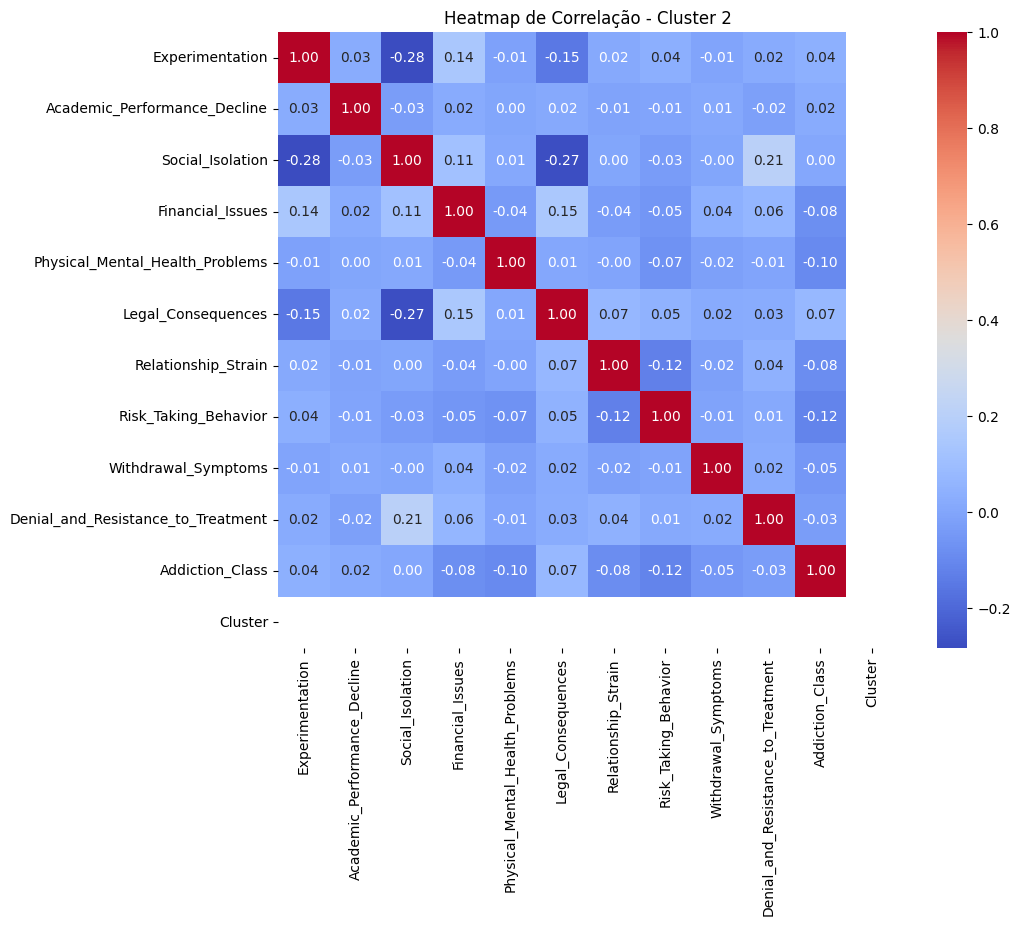

                                    Experimentation  \
Experimentation                            1.000000   
Academic_Performance_Decline              -0.010267   
Social_Isolation                          -0.062730   
Financial_Issues                           0.106076   
Physical_Mental_Health_Problems            0.001973   
Legal_Consequences                        -0.144464   
Relationship_Strain                       -0.020419   
Risk_Taking_Behavior                      -0.067592   
Withdrawal_Symptoms                       -0.050490   
Denial_and_Resistance_to_Treatment         0.187263   
Addiction_Class                           -0.026571   
Cluster                                         NaN   

                                    Academic_Performance_Decline  \
Experimentation                                        -0.010267   
Academic_Performance_Decline                            1.000000   
Social_Isolation                                       -0.001572   
Financial_Is

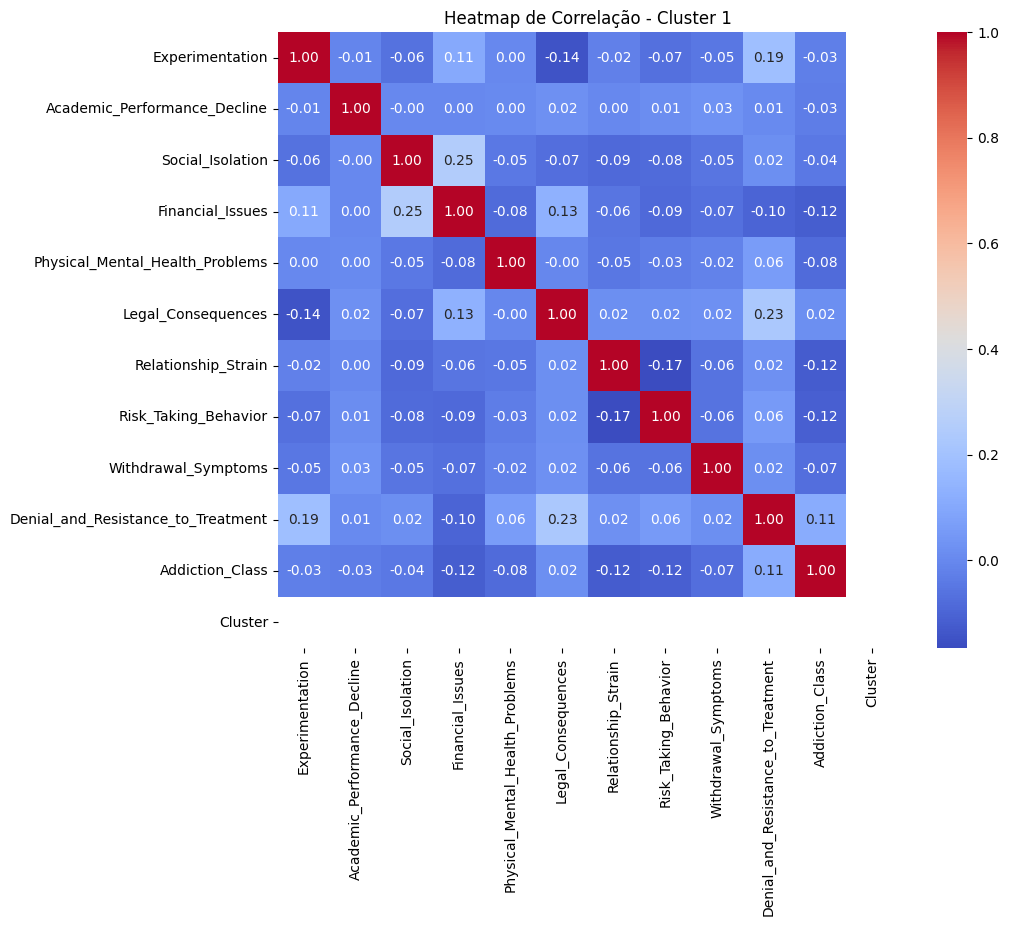

                                    Experimentation  \
Experimentation                            1.000000   
Academic_Performance_Decline              -0.015408   
Social_Isolation                          -0.111380   
Financial_Issues                           0.044975   
Physical_Mental_Health_Problems            0.014423   
Legal_Consequences                        -0.054872   
Relationship_Strain                       -0.016606   
Risk_Taking_Behavior                      -0.017434   
Withdrawal_Symptoms                        0.001338   
Denial_and_Resistance_to_Treatment         0.056786   
Addiction_Class                           -0.001424   
Cluster                                         NaN   

                                    Academic_Performance_Decline  \
Experimentation                                        -0.015408   
Academic_Performance_Decline                            1.000000   
Social_Isolation                                       -0.017987   
Financial_Is

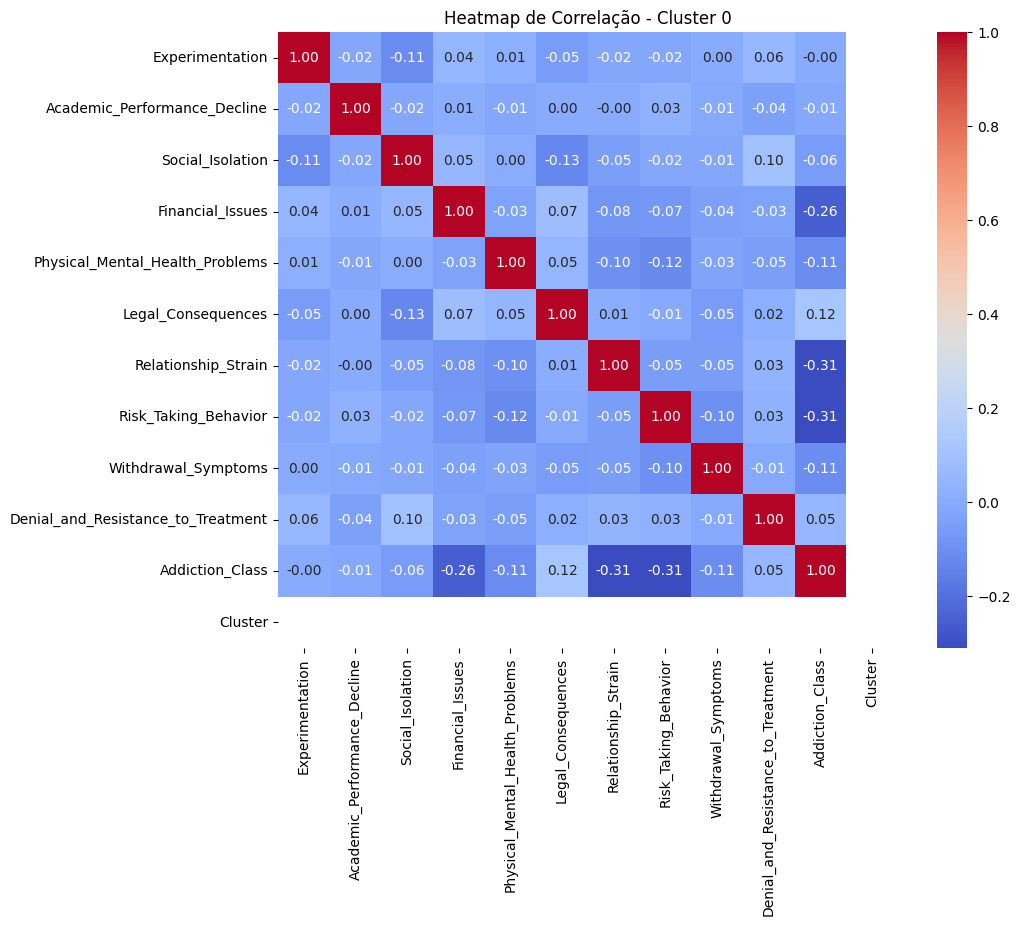

In [25]:
# Para cada cluster, calcular as correlações entre as variáveis
for cluster in df['Cluster'].unique():
    df_cluster = df[df['Cluster'] == cluster]
    correlation_matrix = df_cluster.corr()
    print(correlation_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap de Correlação - Cluster {cluster}')
    plt.show()



Conclusões
Predominância de Não Experimentação (0): Em todos os clusters, a maioria dos estudantes não experimentou a substância (0). Isso pode sugerir que a experimentação não é o comportamento dominante na maioria dos estudantes analisados.
Cluster 2 Tem a Maior População de Não Experimentadores: O cluster 2 destaca-se por ter o maior número de estudantes que não experimentaram, indicando que esse cluster pode estar mais associado a comportamentos mais conservadores ou menos propensos à experimentação.
Menor Variação Entre Clusters Para Experimentação (1): Embora todos os clusters tenham uma quantidade menor de estudantes que experimentaram (1), as proporções parecem relativamente similares, sugerindo que a experimentação é um comportamento menos comum e, portanto, menos discriminativo entre os clusters.